# Basic Plotting with matplotlib



You can show matplotlib figures directly in the notebook by using the `%matplotlib notebook` and `%matplotlib inline` magic commands. 

`%matplotlib notebook` provides an interactive environment.

In [1]:
%matplotlib notebook

In [2]:
import matplotlib as mpl
mpl.get_backend()

'nbAgg'

In [3]:
import matplotlib.pyplot as plt
plt.plot?

#  What's being said here by the star args is that the function supports any 
# number of unnamed arguments. The double star keyword args also means that it 
# supports any number of named arguments.

<IPython.core.display.Javascript object>


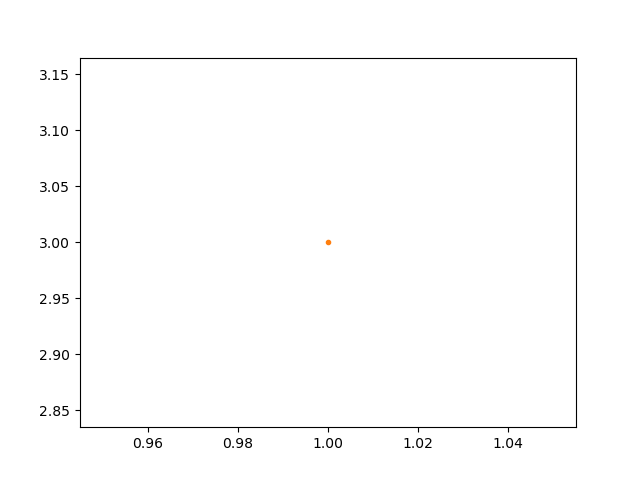

In [4]:
# Just one data point at position (1,3)
# Because the default is the line style '-', nothing will be shown if we 
# only pass in one point (1,3)
plt.plot(1,3)

In [5]:
# We can pass in '.' to plt.plot to indicate that we want the point (3,2) 
# to be indicated with a marker '.'
plt.plot(1, 3, ".")

In [6]:
# First let's set the backend without using mpl.use() from the scripting layer
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

# Create a new figure
fig = Figure()

# Associate it with the backend
canvas = FigureCanvasAgg(fig)

# Add a subplot to the fig
ax = fig.add_subplot(111)

# Plot the point (1,3)
ax.plot(1, 3, ".")

# Save the figure 
canvas.print_png("Test.png")

We can use html cell magic to display the image.

In [7]:
%%html
<img src='Test.png' />

<IPython.core.display.Javascript object>


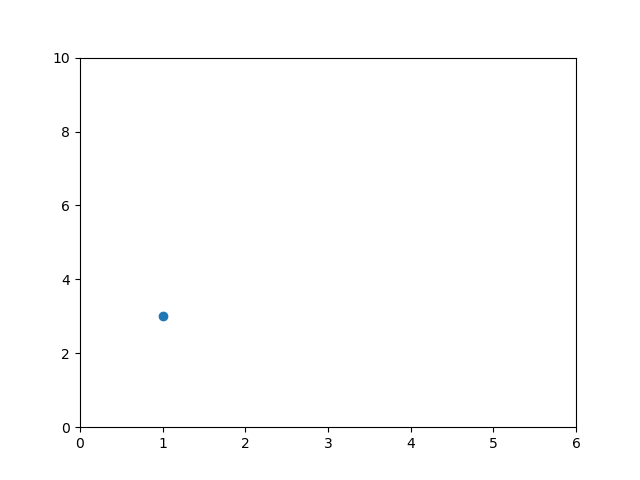

(0.0, 6.0, 0.0, 10.0)

In [8]:
# Create a new figure
plt.figure()

# Plot the point (1,3) using the circle marker
plt.plot(1, 3, "o")

# Get the current axis
ax = plt.gca()

# Set axis properties [xmin, xmax, ymin, ymax]
ax.axis([0,6,0,10])

<IPython.core.display.Javascript object>


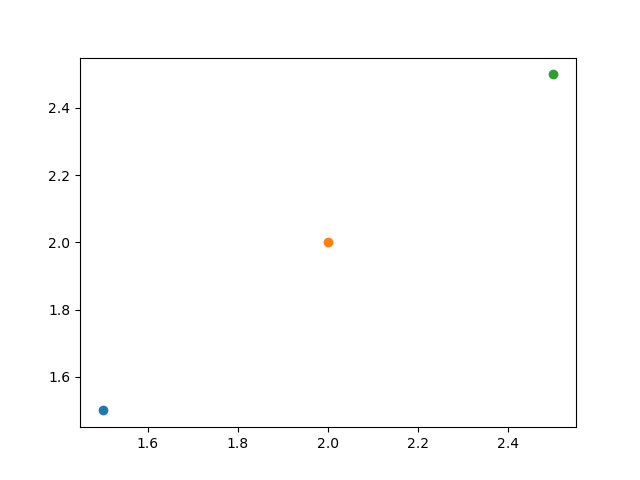

In [9]:
# create a new figure
plt.figure()

# plot the point (1.5, 1.5) using the circle marker
plt.plot(1.5, 1.5, 'o')

# plot the point (2, 2) using the circle marker
plt.plot(2, 2, 'o')

# plot the point (2.5, 2.5) using the circle marker
plt.plot(2.5, 2.5, 'o')

In [10]:
# get current axes
ax = plt.gca()

# get all the child objects the axes contains
ax.get_children()

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

# Scatterplots

<IPython.core.display.Javascript object>


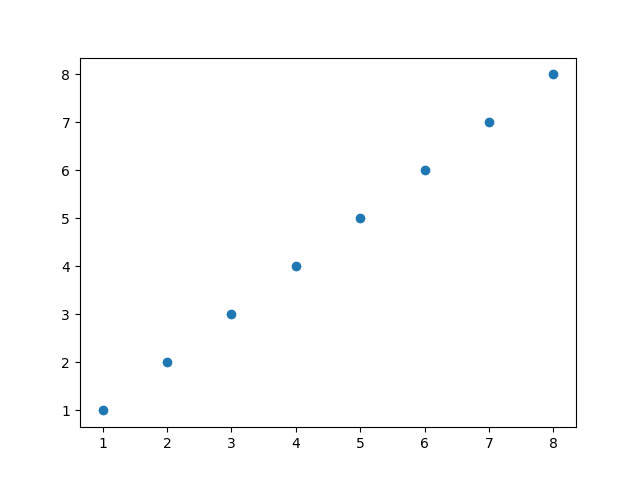

In [11]:
import numpy as np

x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = x

# Create a new figure
plt.figure()

# Scatter plot
plt.scatter(x,y)

<IPython.core.display.Javascript object>


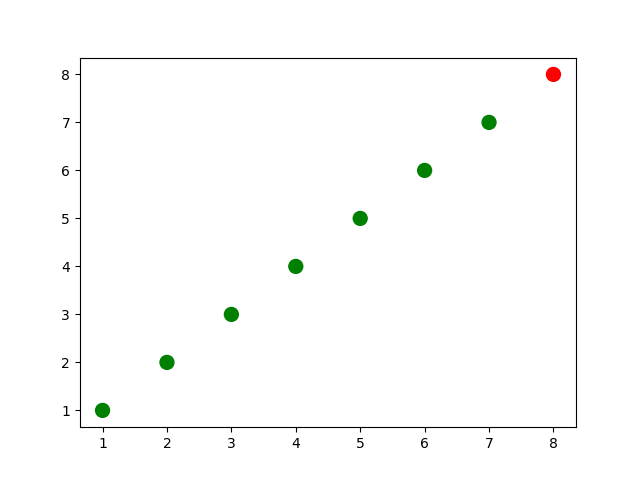

In [12]:
# Create a list of colors for each point to have
# ["green", "green", "green", "green", "green", "green", "green", "red"]
colors = ["green"]*(len(x)-1)
colors.append("red")

plt.figure()

# plot the point with size 100 and chosen colors
plt.scatter(x, y, s=100, c=colors)

In [13]:
# Convert the two lists into a list of pairwise tuples
zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])

print(list(zip_generator))

# The above prints:
# [(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]

[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]


In [14]:
# The single star * unpacks a collection into positional arguments
print(*zip_generator)

# the above prints:
# (1, 6) (2, 7) (3, 8) (4, 9) (5, 10)

<IPython.core.display.Javascript object>


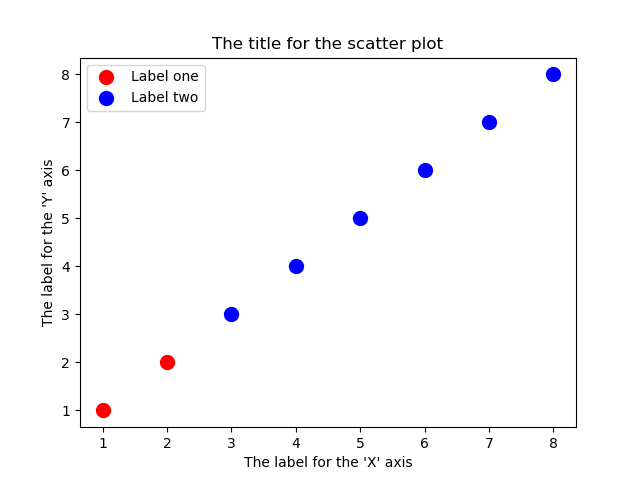

In [15]:
plt.figure()
plt.scatter(x[:2], y[:2], s=100, c="red", label="Label one")
plt.scatter(x[2:], y[2:], s=100, c="blue", label="Label two")

In [16]:
# Add a label to the x axis
plt.xlabel("The label for the 'X' axis")

# Add a label to the y axis
plt.ylabel("The label for the 'Y' axis")

# Add a title
plt.title("The title for the scatter plot")

Text(0.5, 1.0, 'The title for the scatter plot')

In [17]:
# Add a legend (uses the labels from plt.scatter)
plt.legend()

In [18]:
plt.legend(loc=4, # Position of the legend (the lower right hand corner)
           frameon=True, # Rid of the frame
           title="Legend") # Title of the legend

In [19]:
# Get children from current axes
plt.gca().get_children()

 Text(0.5, 1.0, 'The title for the scatter plot'),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

In [20]:
# Get the legend from the current axes (the legend is the second to last item 
# in this list)
legend = plt.gca().get_children()[-2]
legend

In [21]:
# We can use get_children to navigate through the child artists
legend.get_children()[0].get_children()[1].get_children()[0].get_children()

In [22]:
# Import the artist class from matplotlib
from matplotlib.artist import Artist

# Recursive function wich takes in an artist and some depth parameter
# then checks if the object is an artist and if so, prints out its name
def rec_gc(art, depth=0):
    if isinstance(art, Artist):
        print(" " * depth + str(art))
        
        # Increase the depth for pretty printing
        for child in art.get_children():
            rec_gc(child, depth+2)


# Call this function on the legend artist to see what the legend is made up of
rec_gc(plt.legend())

Legend
      Text(0, 0, '')
            Text(0, 0, 'Label one')
            Text(0, 0, 'Label two')
  FancyBboxPatch((0, 0), width=1, height=1)


# Line Plots

<IPython.core.display.Javascript object>


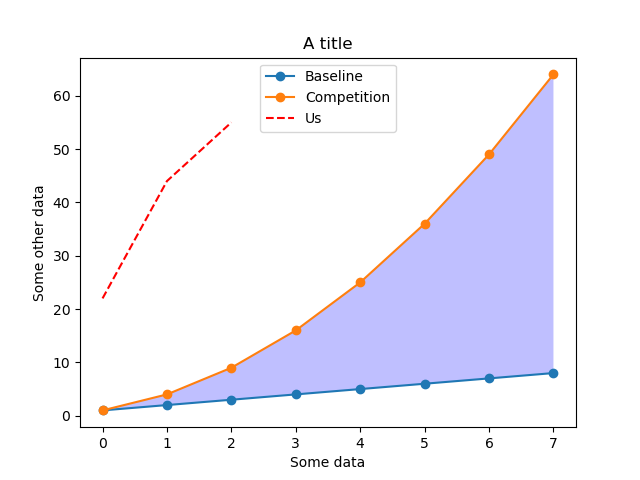

In [23]:
linear_data = np.array([1,2,3,4,5,6,7,8])
exponential_data = linear_data**2

plt.figure()

# Plot the linear data and the exponential data
plt.plot(linear_data, '-o', exponential_data, '-o')

In [24]:
# Plot another series with a dashed red line
plt.plot([22,44,55], "--r")

In [25]:
plt.xlabel("Some data")
plt.ylabel("Some other data")
plt.title("A title")

# Add a legend with legend entries (because we didn't have labels when we 
# plotted the data series)
plt.legend(["Baseline", "Competition", "Us"])

In [26]:
# Fill the area between the linear data and exponential data
plt.gca().fill_between(range(len(linear_data)),
                            linear_data,
                            exponential_data, 
                            facecolor="blue",
                            alpha=0.25)

Let's try working with dates!

<IPython.core.display.Javascript object>


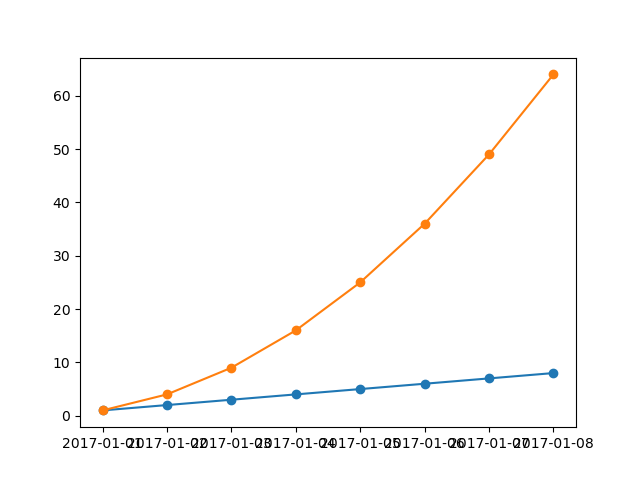

In [27]:
plt.figure()

observation_dates = np.arange('2017-01-01', # Initial date
                              '2017-01-09', # Final date
                              dtype='datetime64[D]') # Type of data

plt.plot(observation_dates,linear_data, "-o",
        observation_dates, exponential_data, "-o",)

<IPython.core.display.Javascript object>


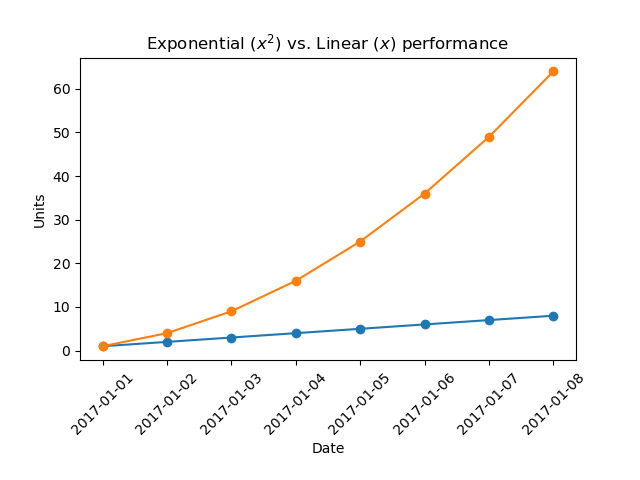

In [28]:
import pandas as pd

plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')

# Convert the map to a list to get rid of the error
observation_dates = list(map(pd.to_datetime, observation_dates)) 

plt.plot(observation_dates, linear_data, '-o', 
         observation_dates, exponential_data, '-o')

In [29]:
x = plt.gca().xaxis

# Rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)

In [30]:
# Adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.25)

In [31]:
ax = plt.gca()
ax.set_xlabel("Date")
ax.set_ylabel("Units")
ax.set_title("Exponential vs. Linear performance")

Text(0.5, 1.0, 'Exponential vs. Linear performance')

In [32]:
# We can add mathematical expressions in any text element same as LaTex
ax.set_title("Exponential ($x^2$) vs. Linear ($x$) performance")

Text(0.5, 1.0, 'Exponential ($x^2$) vs. Linear ($x$) performance')

# Bar Charts

<IPython.core.display.Javascript object>


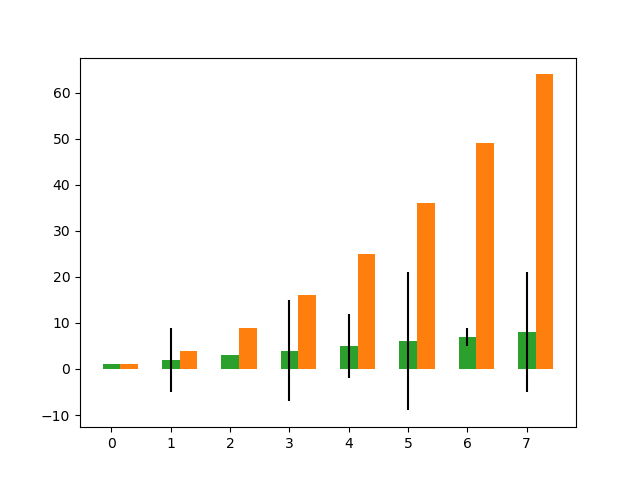

<BarContainer object of 8 artists>

In [48]:
plt.figure()
x_values = range(len(linear_data))
plt.bar(x_values, # x values 
        linear_data, # y values
        width = 0.3) # bar width

In [49]:
new_x_values = []

# Plot another set of bars, adjusting the new xvals to make up for the first 
# set of bars plotted

for item in x_values:
    new_x_values.append(item + 0.3)

plt.bar(new_x_values, exponential_data, width=0.3)

<BarContainer object of 8 artists>

In [50]:
from random import randint

linear_error = [randint(0,15) for x in range(len(linear_data))]

# This will plot a new set of bars with errorbars using the list of random 
# error values
plt.bar(x_values, linear_data, width=0.3, yerr = linear_error)

<BarContainer object of 8 artists>

<IPython.core.display.Javascript object>


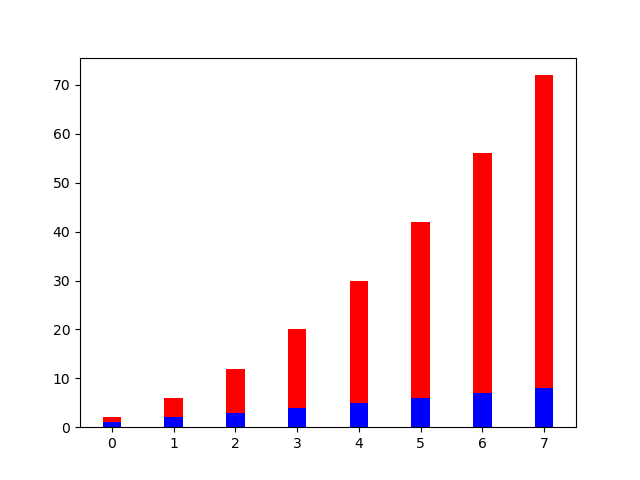

<BarContainer object of 8 artists>

In [51]:
# Stacked bar charts are also possible
plt.figure()
x_values= range(len(linear_data))
plt.bar(x_values, linear_data, width=0.3, color="b")
plt.bar(x_values, exponential_data, width=0.3, bottom=linear_data, color="r")

<IPython.core.display.Javascript object>


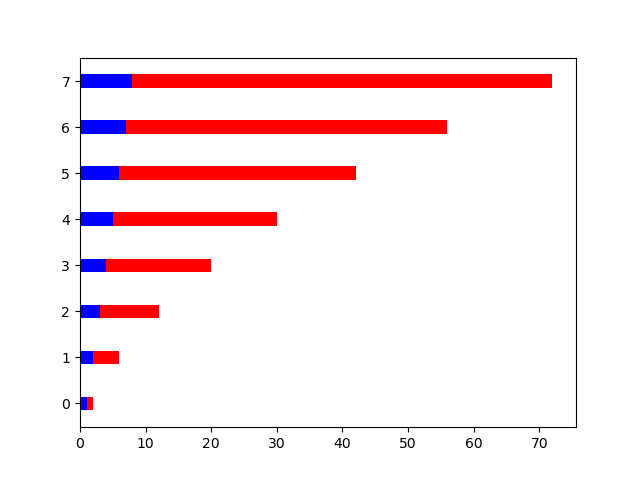

<BarContainer object of 8 artists>

In [53]:
# Or use barh for horizontal bar charts
plt.figure()
x_values= range(len(linear_data))
plt.barh(x_values, linear_data, height=0.3, color="b")
plt.barh(x_values, exponential_data, height=0.3, left=linear_data, color="r")